# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Specify the file paths for your data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the data from the CSV files into two separate DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
 
# Combine the data into a single DataFrame ie, MERGE on "Mouse ID"
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Print number of mice
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display dups
duplicated_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. (not sure how this is different from the one above?)
duplicated_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the data for the duplicate mouse IDs
duplicated_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset="Mouse ID")

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()

# Display number of mice in the cleaned DataFrame
num_mice_cleaned

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the cleaned DF by 'Drug Regimen'
regimen_group = cleaned_data.groupby('Drug Regimen')

# Calculate mean, median, variance, SD, and SEM of tumor vol for each regimen
mean_tumor_volume = regimen_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_group['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = regimen_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_group['Tumor Volume (mm3)'].sem()

# Create summary DataFrame for results
summary_stats_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                            'Median Tumor Volume': median_tumor_volume,
                            'Tumor Volume Variance': variance_tumor_volume,
                            'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                            'Tumor Volume SEM': sem_tumor_volume})

# Display summary stats DataFrame
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the cleaned DataFrame by 'Drug Regimen' and calculate summary statistics using the agg method
summary_stats_df = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename columns to make it easier to read/see
summary_stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Display summary stats table
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

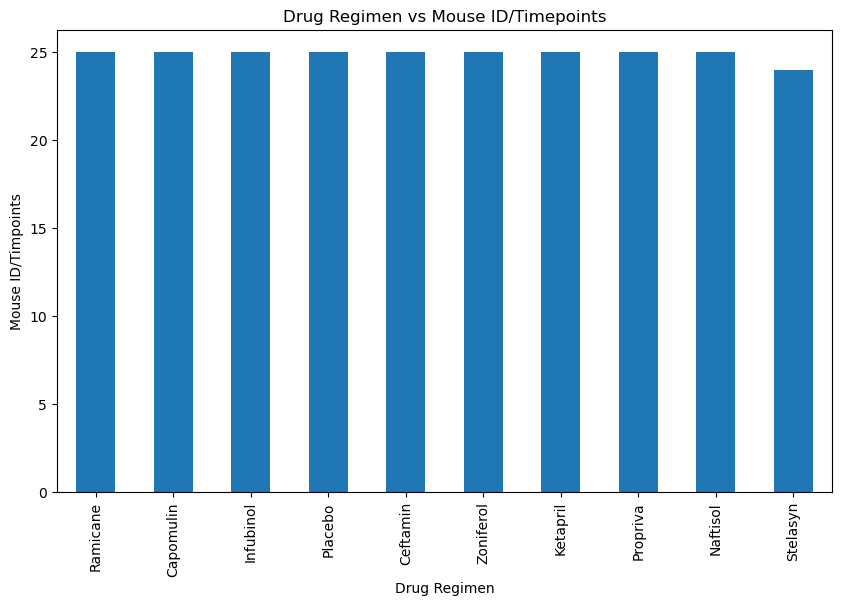

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group cleaned DataFrame by 'Drug Regimen' and count number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Drug Regimen vs Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timpoints')

# Show plot
plt.show()

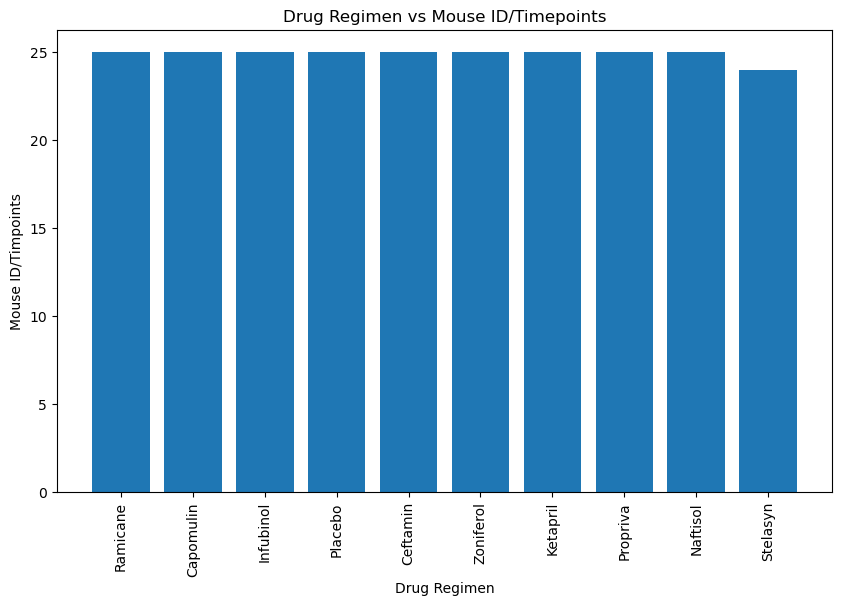

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# # Group the cleaned DataFrame by 'Drug Regimen' and count the number of rows in each group
regimen_countst = cleaned_data['Drug Regimen'].value_counts()

# Extract drug regimens and their value counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create bar plot (using Matplotlib)
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts)

# Add labels and title
plt.title('Drug Regimen vs Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timpoints')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()


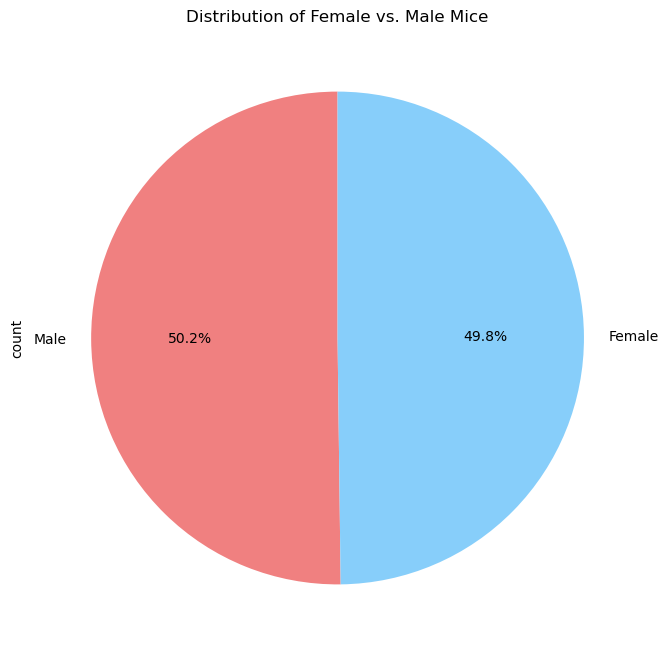

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the cleaned DataFrame by 'Sex' and count the number of mice in each group
sex_counts = cleaned_data['Sex'].value_counts()

# Create pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show plot
plt.show()

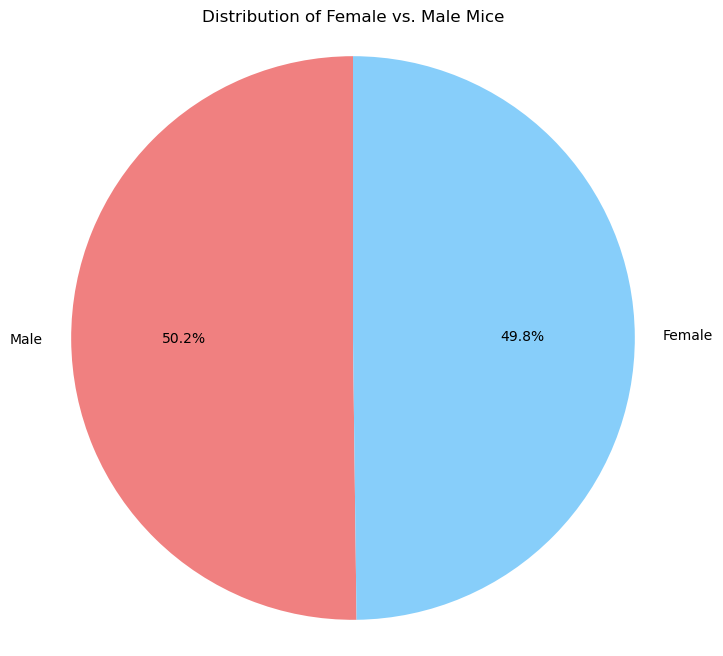

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the cleaned DataFrame by 'Sex' and count the number of mice in each group
sex_counts = cleaned_data['Sex'].value_counts()

# Create pie plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a DataFrame containing only the specified treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(target_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume for each mouse in the specified treatment regimens
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol                45.0
1      a251    Infubinol                45.0
2      a275     Ceftamin                45.0
3      a411     Ramicane                45.0
4      a444     Ramicane                45.0
..      ...          ...                 ...
95     y769     Ceftamin                45.0
96     y793    Capomulin                45.0
97     y865     Ceftamin                45.0
98     z578     Ramicane                45.0
99     z581    Infubinol                45.0

[100 rows x 3 columns]


In [24]:
# Put treatments into a list for FOR LOOP (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter the final_tumor_volume_df for the current treatment regimen
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the current treatment regimen
    tumor_volume = treatment_data['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Find potential outliers
    potential_outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Display the results
    print(f"Results for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {potential_outliers['Tumor Volume (mm3)'].tolist()}")
    print("\n")
    


Results for Capomulin:
IQR: 0.0
Potential outliers: []


Results for Ramicane:
IQR: 0.0
Potential outliers: []


Results for Infubinol:
IQR: 0.0
Potential outliers: []


Results for Ceftamin:
IQR: 0.0
Potential outliers: []




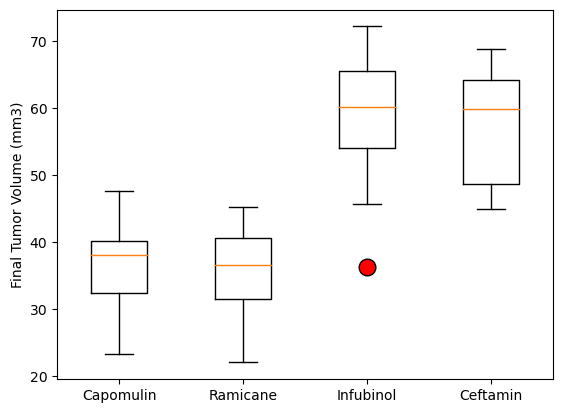

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

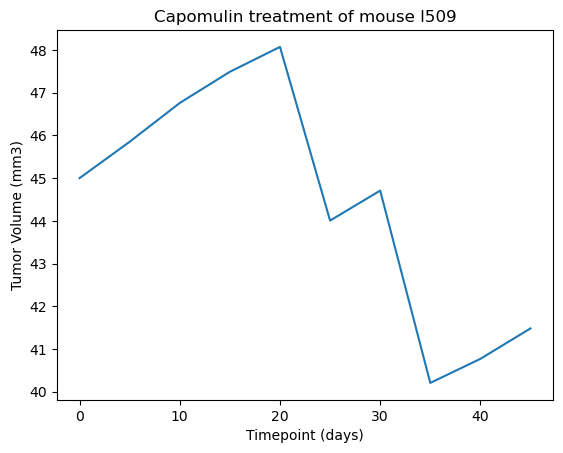

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


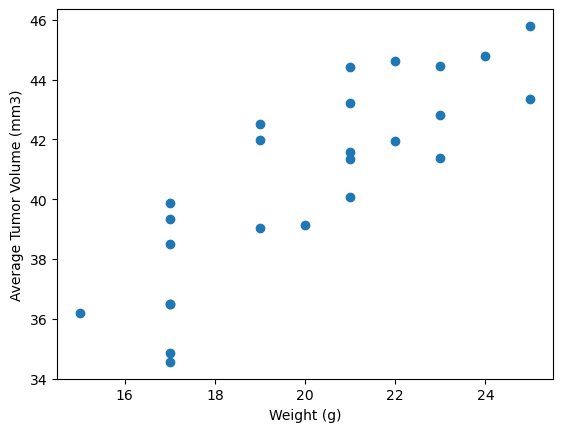

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


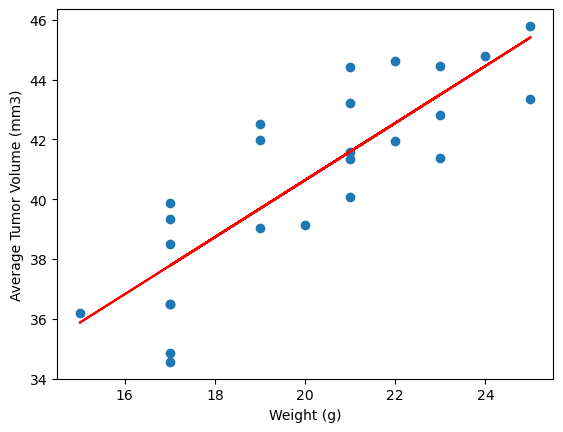

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
